# Introduction

The goal of this project is to get some insight of the used motorcycle data and implement two methods to pridict the selling price: 

1. Grid search
2. Gradient descent 

The data which will be used is `Used motorcycle data set` and was taken from [Kaggle](https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset?select=BIKE+DETAILS.csv).

## Packages Used:

- **pandas** - python library for data manipulation and analysis
- **numpy** - python library for working with arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
- **matplotlib.pyplot** - library for creating static, animated, and interactive visualizations in python
- **math** - standard module in Python which is always available and provides mathematical functions

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Basic Information of the Data

Read the csv file in and have a look at its basic features.

In [34]:
data = pd.read_csv("bikeDetails.csv")
data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


The columns in the data set are following:

1. name (of motorcycle)
2. selling price
3. year (of motorcycle)
4. seller type
5. owner (number of owners)
6. km driven
7. ex showroom price

In [36]:
data.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


Above is the numeric summary of the data.

# Exploratory Data Analysis

The goal of this section is to get some insights about data, especially the selling price. 

After exploring snippet and concise summary of data above, we convert columns `seller_type`, `owner` to categorical type.

In [37]:
data[["seller_type","owner"]] = data[["seller_type","owner"]].apply(lambda x: x.astype("category"))

Confirming variables are converted to categorical.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               1061 non-null   object  
 1   selling_price      1061 non-null   int64   
 2   year               1061 non-null   int64   
 3   seller_type        1061 non-null   category
 4   owner              1061 non-null   category
 5   km_driven          1061 non-null   int64   
 6   ex_showroom_price  626 non-null    float64 
dtypes: category(2), float64(1), int64(3), object(1)
memory usage: 43.9+ KB


## Selling Price Distribution

The most interesting variable in this data set is `selling_price`. Let's start with creating histogram to understand the distribution of the `selling_price`.

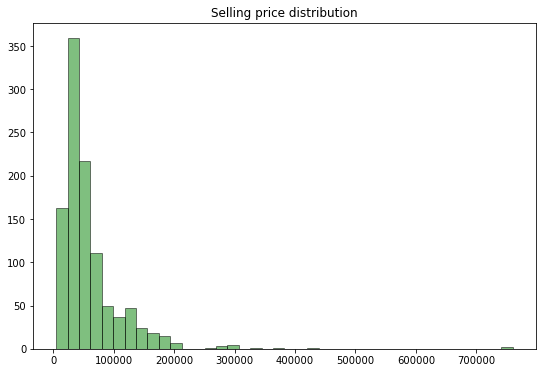

In [39]:
plt.hist(data['selling_price'], bins = 40, ec="black", color = "green", alpha = 0.5)
plt.title ("Selling price distribution")
plt.rcParams["figure.figsize"]= (9,6)
plt.show()
plt.close()

The distribution of `selling_price` is heavily skewed to the right.

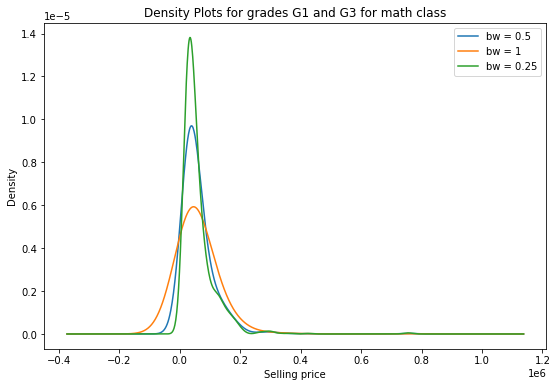

In [40]:
data.selling_price.plot.density(bw_method = 0.5, label = "bw = 0.5")
data.selling_price.plot.density(bw_method = 1, label = "bw = 1")
data.selling_price.plot.density(bw_method = 0.25, label = "bw = 0.25")
plt.xlabel("Selling price")
plt.title("Density Plots for grades G1 and G3 for math class")
plt.legend()
plt.rcParams["figure.figsize"]= (9,6)
plt.show()
plt.close()

Kernel density plot confirms skewness to the right. 

## Correlation

We observe the correlations between the numeric data.

In [41]:
data[["selling_price", "year", "km_driven", "ex_showroom_price"]].corr()

,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.402188,-0.212937,0.918583
year,0.402188,1.000000,-0.288675,0.126378
km_driven,-0.212937,-0.288675,1.000000,-0.122011
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000


Based on the on the correlation map and correlation table, there is strong positive correlation between `selling price` and `ex_showroom_price`.

### Ex-Showroom Price

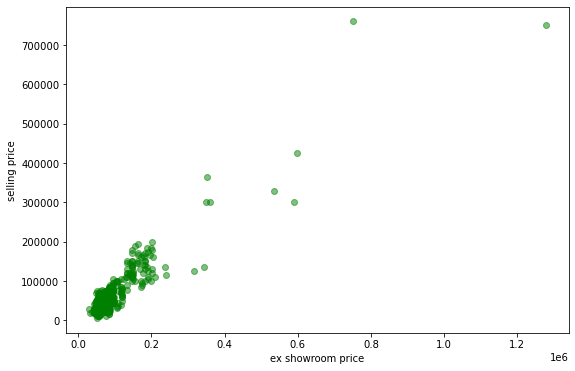

In [42]:
plt.scatter(data.ex_showroom_price, data.selling_price, color = "green", alpha = 0.5)
plt.xlabel("ex showroom price")
plt.ylabel("selling price")
plt.rcParams["figure.figsize"]= (9,6)
plt.show()
plt.close()

Graphs displays strong positive correlation between `selling price` and `ex_showroom_price`.

### Year and km_driven

We observe the distribution of selling price according to year and the mileage.

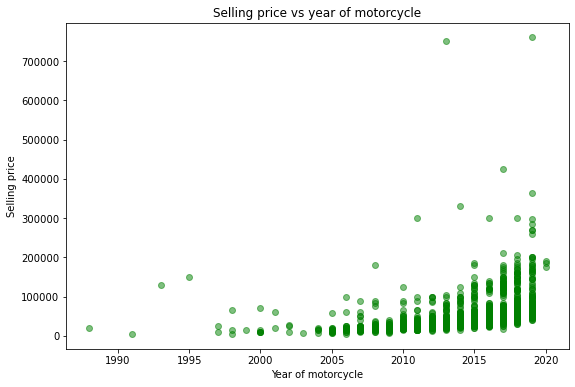

In [44]:
plt.scatter(data.year, data.selling_price, color = "green", alpha = 0.5)
plt.xlabel("Year of motorcycle")
plt.ylabel("Selling price")
plt.title ("Selling price vs year of motorcycle")
plt.rcParams["figure.figsize"]= (9,6)
plt.show()
plt.close()

Selling price is increasing when year of motorcycle is increasing.

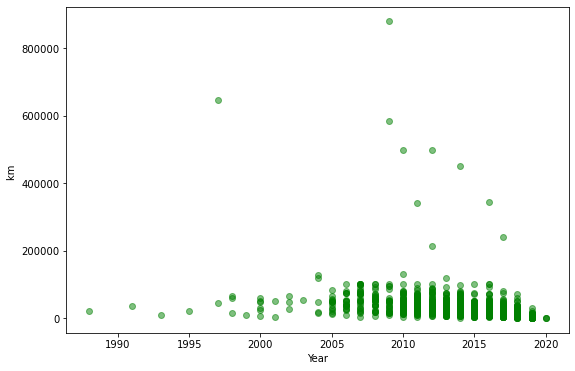

In [45]:
plt.scatter(data.year, data.km_driven, color = "green", alpha = 0.5)
plt.xlabel("Year")
plt.ylabel("km ")
plt.rcParams["figure.figsize"]= (9,6)
plt.show()
plt.close()

Based on the graph above, there is no significant dependency between year of motorcycle and kilometers driven.

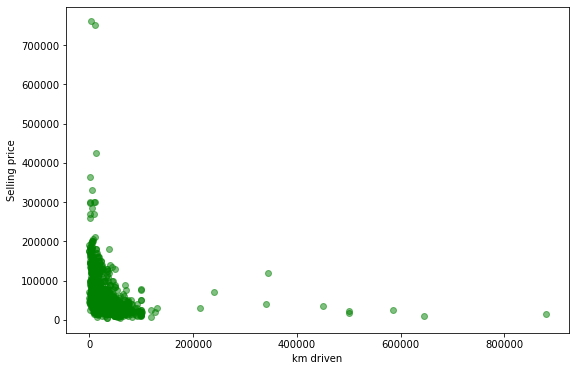

In [46]:
plt.scatter(data.km_driven, data.selling_price, color = "green", alpha = 0.5)
plt.xlabel("km driven")
plt.ylabel("Selling price")
plt.rcParams["figure.figsize"]= (9,6)
plt.show()
plt.close()

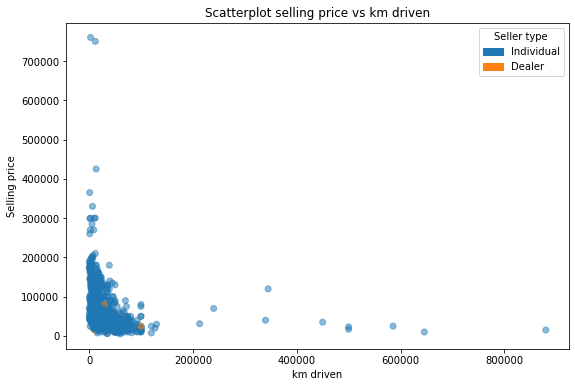

In [47]:
import matplotlib.patches
levels, categories = pd.factorize(data['seller_type'])
colors = [plt.cm.tab10(i) for i in levels]
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]
plt.scatter(data.km_driven, data.selling_price,  c = colors,  alpha = 0.5)
plt.legend(handles=handles, title='Seller type')
plt.xlabel("km driven")
plt.ylabel("Selling price")
plt.title ("Scatterplot selling price vs km driven" )
plt.show()
plt.close()

Selling price is decreasing significantly when number of km driven increasing for both seller types.

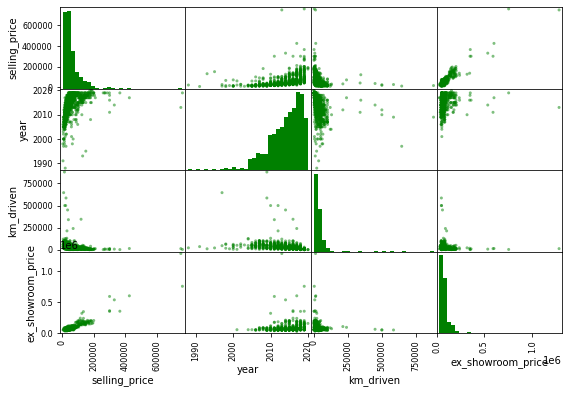

In [48]:
pd.plotting.scatter_matrix(data, color="green", hist_kwds={'bins':30, 'color':'green'})
plt.rcParams["figure.figsize"]= (9,6)
plt.show()
plt.close()

## Owner and Seller Type

In [49]:
two_way_cross_tab = pd.crosstab (data.owner, data.seller_type, margins = True)
two_way_cross_tab

seller_type,Dealer,Individual,All
owner,,,
1st owner,4,920,924
2nd owner,2,121,123
3rd owner,0,11,11
4th owner,0,3,3
All,6,1055,1061


Most of the observations for `Individual` seller type. Among `Individual` seller type, most of the observations are for 1st owner.

<AxesSubplot:xlabel='owner'>

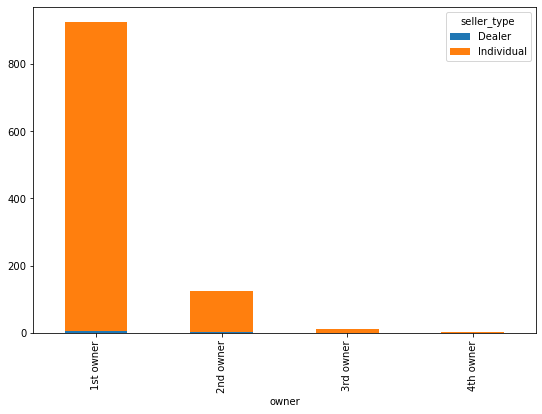

In [50]:
two_way_cross_tab.loc[('1st owner', '2nd owner', '3rd owner', '4th owner'),
                      ('Dealer', 'Individual')].plot.bar(stacked = True)

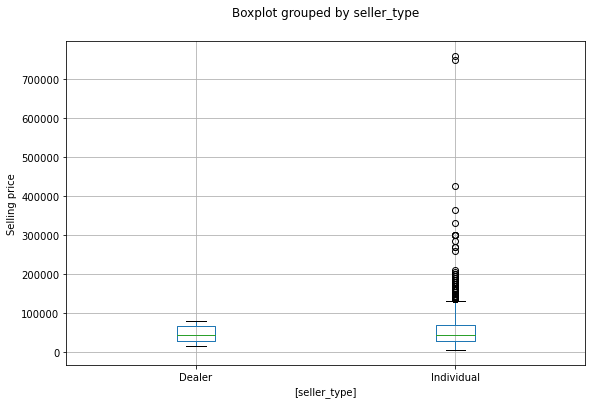

In [51]:
data.boxplot(column = ["selling_price"], by = ["seller_type"])
plt.title("")
plt.ylabel("Selling price")
plt.show()
plt.close()

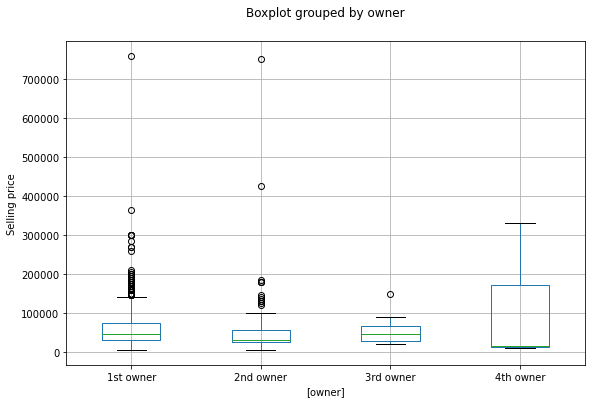

In [52]:
data.boxplot(column = ["selling_price"], by = ["owner"])
plt.title("")
plt.ylabel("Selling price")
plt.show()
plt.close()

Next we take a look at the mean and median of the selling price group by owner type.

In [53]:
data[['selling_price','owner']].groupby('owner').mean()

,selling_price
owner,
1st owner,60022.813853
2nd owner,55666.658537
3rd owner,55727.272727
4th owner,118333.333333


In [54]:
data[['selling_price','owner']].groupby('owner').median()

,selling_price
owner,
1st owner,45000
2nd owner,32000
3rd owner,45000
4th owner,15000


The selling price of the 2nd owners are the lowest. We can notice that there should be some extremely high prices of motorcycles sold by 4th owner. We can see the distribution of selling prices of different owner types more clear by looking at the histgrams below.

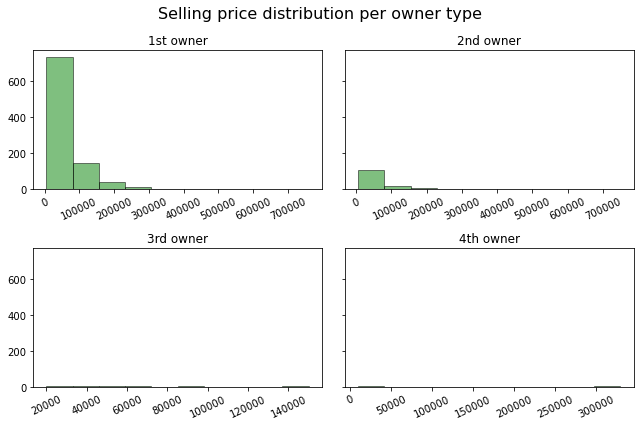

In [55]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
fig.suptitle("Selling price distribution per owner type", fontsize=16)
axs[0, 0].hist(data.loc[data.owner == "1st owner", ["selling_price"]].selling_price, color = "green", alpha = 0.5, ec="black")
axs[0, 0].set_title('1st owner')
axs[0][0].tick_params(axis='x', rotation=25)
axs[0, 1].hist(data.loc[data.owner == "2nd owner", ["selling_price"]].selling_price, color = "green", alpha = 0.5, ec="black")
axs[0, 1].set_title('2nd owner')
axs[0][1].tick_params(axis='x', rotation=25)
axs[1, 0].hist(data.loc[data.owner == "3rd owner", ["selling_price"]].selling_price, color = "green", alpha = 0.5, ec="black")
axs[1, 0].set_title('3rd owner')
axs[1][0].tick_params(axis='x', rotation=25)
axs[1, 1].hist(data.loc[data.owner == "4th owner", ["selling_price"]].selling_price, color = "green", alpha = 0.5, ec="black")
axs[1, 1].set_title('4th owner')
axs[1][1].tick_params(axis='x', rotation=25)
plt.show()
plt.close()

Selling price distributions per owner type. Most of the observations have `owner` = `1st owner`.

We can also take a look at the average selling price group by both onwer type and seller type.

In [56]:
data[['selling_price','seller_type','owner']].groupby(['seller_type','owner']).mean()

selling_price
seller_type owner                   
Dealer      1st owner   60000.000000
            2nd owner   20000.000000
            3rd owner            NaN
            4th owner            NaN
Individual  1st owner   60022.913043
            2nd owner   56256.190083
            3rd owner   55727.272727
            4th owner  118333.333333

# Grid Search Algorithm

### Just *y*

In this case we don’t consider any data other than the y′s. That is, c is going to just be a constant that minimizes the function.

Define loss function.

In [57]:
def loss_func(y, c):
    '''
    Returns loss fucntion for two variables
    '''
    return (y-c)**2

Define function which calculates `Root Mean Square Error` for the list of values `c` and `y's`.

In [58]:
def rmse(dy, c):
    '''
    Returns dictionary for root mean square errors for the list of c and series dy
    Keys for returned dictionary are values of c, values - calculated rmse for each c
    '''
    result = {}
    try:
        for i in range(len (c)):
            sum_y = 0
            for j in range(dy.shape[0]):
                sum_y = sum_y + (loss_func(dy[j], c[i]))
            value = math.sqrt( 1/(dy.shape[0])*sum_y )   
            result.update({c[i]: value})
        return result
    except Exception as e:
        print("Exception occurred " + str(e))

Create function which will be initialize list of `c` with initial guess based on the `y's` values.

In [64]:
def create_grid_for_c(dy):
    '''
    Returns grid of values for c
    '''
    result = []
    result.append (dy.median())
    result.append (dy.median() + 0.05*dy.std())
    result.append (dy.median() - 0.05*dy.std())
    result.append (dy.median() + 0.1*dy.std())
    result.append (dy.median() - 0.1*dy.std())
    result.append (dy.median() + 0.2*dy.std())
    result.append (dy.median() - 0.2*dy.std())
    result.append (dy.mean())
    result.append (dy.mean() + 0.05*dy.std())
    result.append (dy.mean() - 0.05*dy.std())
    result.append (dy.mean() + 0.1*dy.std())
    result.append (dy.mean() - 0.1*dy.std())
    result.append (dy.mean() + 0.2*dy.std())
    result.append (dy.mean() - 0.2*dy.std())
    result.append (dy.mean() + 0.3*dy.std())
    result.append (dy.mean() - 0.3*dy.std())
    result.append (dy.mean() + 0.5*dy.std())
    result.append (dy.mean() - 0.5*dy.std())
    return result

Create function for grid search algorithm.

In [67]:
def grid_search_with_const (dy):
    '''
    Returns optimal prediction for y using grid search algorithm with y as an input 
    '''
    try:
        c = create_grid_for_c(dy)
        results = rmse(dy, c)
        c_opt = min(results, key=results.get)
        return c_opt
    except Exception as e:
        print("Exception occurred " + str(e))        

Find optimal value for `selling_price` using just implemented grid search algorithm. 

In [68]:
optimal_price = grid_search_with_const (data.selling_price)
print ("Optimal value for selling price is " + str (optimal_price))

Optimal value for selling price is 59638.151743638075


To be sure the algorithm generalizes, will run it using the `km_driven` variable as the response.

In [69]:
km_driven_opt = grid_search_with_const (data.km_driven)
print ("Optimal value for km driven is " + str (km_driven_opt))

Optimal value for km driven is 34359.83317624882


### Using *y* and another numeric variable *x*

We will implement the grid search to find the optimal pair of values for `b0` and `b1` using `km_driven` as your `x` variable and `selling_price` as `y` variable.

First, populate grid for `b0` and `b1`. Grid will be created with integers between the range 60000 to 70000 for `b0` and with values of -1 to 1 by 0.01 for `b1`.

In [81]:
b0 = np.arange(start=6000, stop = 7005, step=5)
b1 = np.arange (start=-1, stop=1.01, step=0.01)
input_grid = {'b0':b0, 'b1':b1}

Grid search algorithm implementation with x and y as input parameters.

In [82]:
def grid_search_with_extra_variable(input_grid, dx, dy):
    '''
    Returns optimal values for b0 and b1 using grid search algorithm
    '''
    try:
        df_input = pd.DataFrame(input_grid,  columns = ["b0", "b1"]);
        result = pd.DataFrame(columns = ["b0", "b1", "rmse"])
    
        for i in range (df_input.b0.shape[0]):
            for j in range (df_input.b1.shape[0]):
                sum_y = 0
                for k in range (dx.shape[0]):
                    c_i = df_input.b0[i] + df_input.b1[j]*dx[k]
                    sum_y = sum_y + (loss_func(c_i, dy[k]))
                rmse = math.sqrt(1/(dx.shape[0])*sum_y)   
                df2 = {'b0': df_input.b0[i], 'b1': df_input.b1[j], 'rmse':rmse}    
                result = result.append(df2,ignore_index = True) 
        return result[ (result.rmse == result.rmse.min())]
    except Exception as e:
        print("Exception occurred " + str(e))  

In [83]:
optimal = grid_search_with_extra_variable(input_grid, data.km_driven, data.selling_price)  

In [84]:
print ("Derived best value for b0 is", optimal.b0.to_string(index=False, header=False), 
       "best value for b1 is", optimal.b1.to_string(index=False, header=False), 
       "with estimated RMSE", optimal.rmse.to_string(index=False, header=False))

Derived best value for b0 is  7000.0 best value for b1 is  0.31 with estimated RMSE  74627.683172


Will use derived combination of b0 and b1 to predict the selling_price for km_driven of 10000.

In [74]:
x = 10000
y = optimal.b0+optimal.b1*x
print(y)

40331    10100.0
dtype: float64


Will use your derived combination of b0 and b1 to predict the selling_price for km_driven of 25000.

In [75]:
x = 25000
y = optimal.b0+optimal.b1*x
print(y)

40331    14750.0
dtype: float64


Will use your derived combination of b0 and b1 to predict the selling_price for km_driven of 35000.

In [76]:
x = 35000
y = optimal.b0+optimal.b1*x
print(y)

40331    17850.0
dtype: float64


# Gradient decent 


Now we will implement Gradient Descent Algorithm(GDA). GDA is optimization algorithm used to find a local minimum of a given function.

### Just *y*

First, we will consider the `y′s` and no `x′s`.

Root Mean square error function.

In [77]:
def rmse2(dy, c):
    '''
    Returns root rean square error for series dy and constant c
    '''
    result = {}
    sum_y = 0
    for j in range(dy.shape[0]):
        sum_y = sum_y + (loss_func(dy[j], c))
    value = math.sqrt( 1/(dy.shape[0])*sum_y )   
    return value 

Gradient decent function to find optimal values consider only `y's`.

In [78]:
def gradient_decent_1(dy, attempts):
    '''
    Implements gradient decent algorithm with y only as a parameter
    '''
    delta = 0.005
    step_size = 0.5
    cur_c = 50000
    
    try:
        diff_quotient = (rmse2(dy, cur_c+delta) - rmse2(dy, cur_c) )/delta
        new_c = cur_c - diff_quotient*step_size
        for i in range (attempts):
            if (abs((new_c - cur_c)) < 0.04):
                cur_c = new_c
                print ('Convergence found!')
                break
            else:
                cur_c = new_c
                diff_quotient = (rmse2(dy, cur_c+delta) - rmse2(dy, cur_c) )/delta
                new_c = cur_c - diff_quotient*step_size
        return cur_c
    except Exception as e:
        print("Exception occurred " + str(e))  

In [79]:
price_opt = gradient_decent_1(data.selling_price, 100000) 
print ("Optimal value for selling price is " + str (price_opt))

Convergence found!
Optimal value for selling price is 55121.52916314517


In [ ]:
km_driven_opt = gradient_decent_1(data.km_driven, 40000)
print ("Optimal value for km driven is " + str (km_driven_opt))

### Using *y* and another numeric variable *x*

Root Mean Square Error function takes `y`, `x`, `b0`, `b1` as input arguments and returns root mean square error.

In [ ]:
def rmse3(dy,dx, b0, b1):
    '''
    Returns root mean square error calculated with b0, b1, dx
    '''
    try:
        result = {}
        sum_y = 0
        for j in range(dy.shape[0]):
            sum_y = sum_y + (loss_func(dy[j], (b0+b1*dx[j])))
            value = math.sqrt( 1/(dy.shape[0])*sum_y )   
        return value
    except Exception as e:
        print("Exception occurred " + str(e))

Difference quotient function for `b0` to approximate the slope of the tangent line in the direction of `b0` and difference quotient function for `b1` to approximate the slope of the tangent line in the direction of `b1`.

In [ ]:
def diff_quotient_b0 (dy, dx, b0, b0_delta, b1):
    return (rmse3(dy, dx, b0+b0_delta, b1) - rmse3 (dy, dx, b0, b1))/b0_delta


def diff_quotient_b1 (dy, dx, b0, b1, b1_delta):
    return (rmse3(dy, dx, b0, b1+b1_delta) - rmse3 (dy, dx, b0, b1))/b1_delta

Gradient decent function to find optimal values of `b0` and `b1`.

In [ ]:
def grad_decent_2(dx, dy, attempts):
    '''
    Implements gradient decent algorithm with dx, dy, b0 and b1 as input parameters
    '''
    cur_b0 = 60000
    cur_b1 = 0
    
    step_size_b0 = 1
    step_size_b1 = 0.000005
    delta = 0.005
    try:
        for i in range (attempts):
            dif_q_b0 = diff_quotient_b0 (dy, dx, cur_b0, delta, cur_b1)
            new_b0 = cur_b0 - dif_q_b0*step_size_b0

            dif_q_b1 = diff_quotient_b1 (dy, dx, new_b0, cur_b1, delta)
            new_b1 = cur_b1 - dif_q_b1*step_size_b1
    
            cur_point = np.array((cur_b0, cur_b1))
            new_point = np.array((new_b0, new_b1))
            dist = np.linalg.norm(cur_point - new_point)
        
            if (dist < 0.04):
                print ("Convergence found in " + str(i) + " iteration")
                return new_point
            cur_b0 = new_b0
            cur_b1 = new_b1
        print ("Convergence not found")    
        return new_point
    except Exception as e:
        print("Exception occurred " + str(e))

In [ ]:
optimal = grad_decent_2(data.km_driven, data.selling_price, 100000)     

In [ ]:
print("Optimal value for b0 is", optimal[0], "\nOptimal value for b1 is", optimal[1])

Use your optimal combination of `b0` and `b1` derived above to predict selling prices.

In [ ]:
x = 10000
optimal[0] + optimal[1]*x

In [ ]:
x = 25000
optimal[0] + optimal[1]*x

In [ ]:
x = 35000
optimal[0] + optimal[1]*x